### Notebook for SlideCNA - Bead Splitting

In [7]:
libraries <- c("ggplot2", "Seurat", "glue", "dplyr", "anndata", "spacexr", 
               "data.table", "Matrix", "mltools", "enrichR", "R.utils")
lapply(libraries, function(x) suppressMessages(require(x, character.only = TRUE,quietly=TRUE,warn.conflicts = FALSE)))

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

#### HTAPP-895-SMP-7359

In [8]:
sample <- "HTAPP-895-SMP-7359"

In [9]:
# Assumes you're working in the repository root directory
source(glue("code/utils.R"))

### Create beads and counts objects from bead split anndata object

In [15]:
so_adata <- anndata::read_h5ad(paste0("path/to/data/", 
                                      sample,
                                      "_slide-seq_processed_bs.h5ad"))

In [16]:
beads_df <- so_adata$obs %>% 
    `colnames<-`(c("bc", "pos_x", "pos_y", "replicate", "RCTD")) %>%
    mutate(bc = as.character(bc)) %>%
    mutate(orig_bc = bc) %>%
    group_by(orig_bc) %>%
    mutate(bc = paste0(bc, "-", c(1:n()))) %>%
    ungroup() %>%
    as.data.frame() %>%
    `rownames<-`(.[,'bc'])

In [17]:
X_t <- so_adata$X %>%
    t()
counts <- cbind(as.data.frame(colnames(so_adata$X)), X_t) %>%
    `colnames<-`(c("GENE", beads_df$bc)) %>%
    `rownames<-`(.[,'GENE'])

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 2.3 GiB"


In [18]:
head(beads_df)

,bc,pos_x,pos_y,replicate,RCTD,orig_bc
,<chr>,<dbl>,<dbl>,<fct>,<ord>,<chr>
TCATATACTGTTGT-1-1,TCATATACTGTTGT-1-1,573.4835,1325.0195,1,MBC,TCATATACTGTTGT-1
TACTTTCAGGACTG-1-1,TACTTTCAGGACTG-1-1,553.3513,1388.4575,1,MBC,TACTTTCAGGACTG-1
AACCCAAGTTAGGG-1-1,AACCCAAGTTAGGG-1-1,857.6451,1081.8535,1,MBC,AACCCAAGTTAGGG-1
ACTCAGGCCTCCAC-1-1,ACTCAGGCCTCCAC-1-1,898.0179,1044.6019,1,MBC,ACTCAGGCCTCCAC-1
TTCGCTCCACACTT-1-1,TTCGCTCCACACTT-1-1,1220.1276,701.8704,1,MBC,TTCGCTCCACACTT-1
TATGCGGTCGACAA-1-1,TATGCGGTCGACAA-1-1,694.5063,1551.9726,1,MBC,TATGCGGTCGACAA-1


In [19]:
head(counts)

,GENE,TCATATACTGTTGT-1-1,TACTTTCAGGACTG-1-1,AACCCAAGTTAGGG-1-1,ACTCAGGCCTCCAC-1-1,TTCGCTCCACACTT-1-1,TATGCGGTCGACAA-1-1,TTATCAATGACGAC-1-1,CATAAGTGCGACAA-1-1,AACGGCAAATTCAC-1-1,...,GTAATTGTCCCAAA-1-3,AAGGTGGTCTAGGG-1-2,CTAAGTGTTTCTCG-1-2,GACACATGATAGCG-1-2,CGAATTAATTTCAT-1-2,CTCCAATAGCTTAA-1-2,TGATGAAAGGACTA-1-2,CATACCGGCCATTA-1-2,GCCCGATGATGTTG-1-4,TACCCAACGCGATT-1-2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,A1BG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1BG-AS1,A1BG-AS1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
A2M,A2M,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M-AS1,A2M-AS1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,A2ML1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1-AS1,A2ML1-AS1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
dim(beads_df)

[1] 21390     6

In [21]:
dim(counts)

[1] 14203 21391

In [22]:
saveRDS(beads_df, "path/to/results/beads_df.rds")
saveRDS(counts, "path/to/results/counts.rds")

### Visualize RCTD annotations of cell types after bead splitting

In [23]:
# Reformat counts

In [24]:
counts_mat <- counts %>% as.data.table() %>% sparsify()
row.names(counts_mat) <- row.names(counts)

In [25]:
counts$GENE <- row.names(counts)
counts_long=reshape2::melt(counts,id.vars = "GENE")
counts_long = as.data.table(counts_long)
counts_long <- counts_long[counts_long$value!=0]

In [26]:
counts_long=merge(counts_long,beads_df,by.x="variable",by.y="bc",all.x=TRUE)
head(counts_long)

variable,GENE,value,pos_x,pos_y,replicate,RCTD,orig_bc
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<ord>,<chr>
AAAAAAAGAATATC-1-1,ALDH18A1,1,557.6036,1327.051,1,MBC,AAAAAAAGAATATC-1
AAAAAAAGAATATC-1-1,CA12,1,557.6036,1327.051,1,MBC,AAAAAAAGAATATC-1
AAAAAAAGAATATC-1-1,CALR,1,557.6036,1327.051,1,MBC,AAAAAAAGAATATC-1
AAAAAAAGAATATC-1-1,CLPTM1L,1,557.6036,1327.051,1,MBC,AAAAAAAGAATATC-1
AAAAAAAGAATATC-1-1,COX6C,1,557.6036,1327.051,1,MBC,AAAAAAAGAATATC-1
AAAAAAAGAATATC-1-1,DCTPP1,1,557.6036,1327.051,1,MBC,AAAAAAAGAATATC-1


In [27]:
summary(counts_long[,sum(value),by=c("pos_x","pos_y")]$V1)
summary(counts_long[,sum(value!=0),by=c("pos_x","pos_y")]$V1)
length(unique(counts_long$variable))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   22.0   136.0   348.0   558.5   757.5  6502.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   22.0   114.2   273.0   393.3   548.8  3260.0 

[1] 21390

In [28]:
# Plot distribution of marker gene counts over space

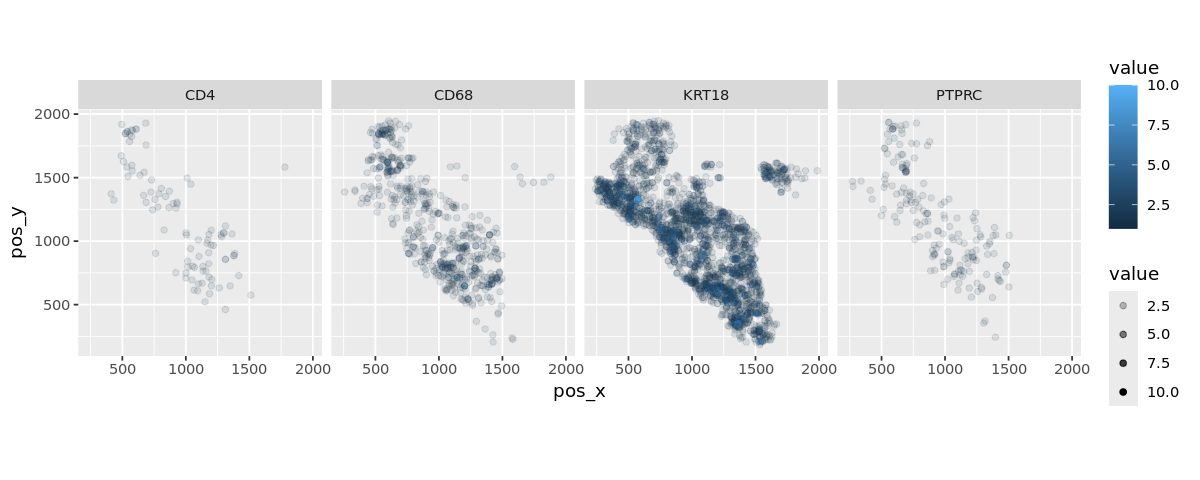

In [29]:
options(repr.plot.width = 10, repr.plot.height =4)
ggplot(counts_long[GENE%in%c("KRT18","CD4","CD68","PTPRC")],aes(x=pos_x,y=pos_y))+geom_point(aes(col=value,alpha=value))+coord_fixed()+facet_grid(~GENE)

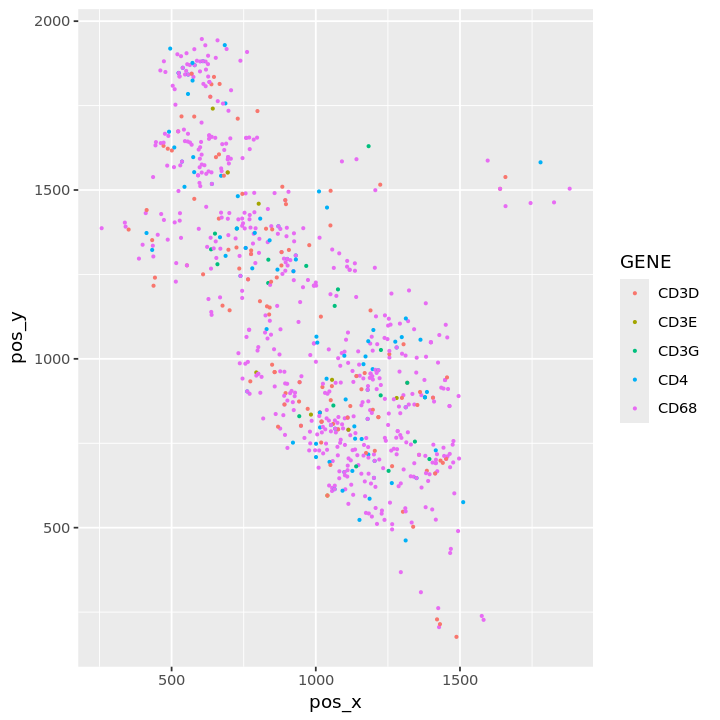

In [30]:
options(repr.plot.width = 6, repr.plot.height =6)
ggplot(counts_long[GENE%in%c("CD3E","CD3D","CD3G","CD3A","CD3B","CD4","CD68","CD56")],aes(x=pos_x,y=pos_y))+geom_point(aes(col=GENE),size=0.5)

### Create a Seurat Object from bead split Slide-seq data

In [31]:
so=make_seurat_annot(counts_mat, beads_df)

Regressing out nCount_RNA, percent.mito

Centering and scaling data matrix

PC_ 1 
Positive:  TFF1, KRT19, COX6C, TFF3, MGP, ACTG1, AGR2, LDHA, ADIRF, RPLP0 
	   GAPDH, TUBA1B, MT-CYB, MT-ND2, CALM2, SOD1, TRPS1, MT-ATP6, PDCD4, TM4SF1 
	   DHRS2, IGFBP4, H3F3B, CRABP2, S100A14, PEBP1, ESR1, NDRG1, DSP, GSTM3 
Negative:  IGKC, IGHG3, IGLC2, HLA-DRA, APOC1, APOE, IGHM, IGLC3, IGHG1, RNASE1 
	   C1QB, HLA-DPB1, IGHG2, LYZ, GPNMB, C1QA, CTSB, IGLL5, SPP1, IGHA1 
	   HLA-DPA1, AIF1, MS4A6A, PLIN2, IGHG4, CCL18, IGLV3-1, CD14, MSR1, ACP5 
PC_ 2 
Positive:  IGHG3, IGKC, IGHG1, IGLC2, IGHG4, IGHM, IGLC3, IGLL5, IGHG2, IGHA1 
	   IGLV3-1, IGLV3-21, JSRP1, IFNG-AS1, IGHD, IGLV2-14, IGLV2-8, IGLV1-51, CD27, COL3A1 
	   IGKV4-1, KCNN3, IGHA2, TFF1, SLC38A1, CALD1, ACTA2, CCL5, COL1A2, CRISPLD1 
Negative:  APOE, CTSB, HLA-DRA, APOC1, RNASE1, C1QB, C1QA, LYZ, GPNMB, SPP1 
	   HLA-DPB1, HLA-DPA1, CCL18, AIF1, PLIN2, ACP5, MS4A6A, FCER1G, CD14, CXCL9 
	   MSR1, TREM2, FCGRT, PLXDC2, MT-ATP6, DAB2, MM

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 21390
Number of edges: 657842

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9156
Number of communities: 33
Elapsed time: 13 seconds


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
15:24:21 UMAP embedding parameters a = 0.9922 b = 1.112

15:24:21 Read 21390 rows and found 10 numeric columns

15:24:21 Using Annoy for neighbor search, n_neighbors = 30

15:24:21 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:24:33 Writing NN index file to temp file /local/scratch/42516337.1.interactive/Rtmp2cD0PU/file358532e449247

15:24:33 Searching Annoy index using 1 thread, search_k = 3000

15:25:03 Annoy recall = 99.73%

15:25:05 Commencing smooth kNN distance calibration usin

In [32]:
# Annotate which RCTD cell types are normal/reference vs malignant
so@meta.data$cluster_type <- 'Normal'
so@meta.data[so@meta.data$RCTD == 'MBC',]$cluster_type <- 'Malignant' # MBC = metastatic breast cancer
md=as.data.table(so@meta.data)
rownames(md) <- md$bc

In [33]:
save(so, file="path/to/results/so.Robj")
save(md, file="path/to/results/md.Robj")

In [34]:
load(file="path/to/results/so.Robj")
load(file="path/to/results/md.Robj")

In [35]:
dim(md)

[1] 21390    13

In [36]:
# TSNE Plots

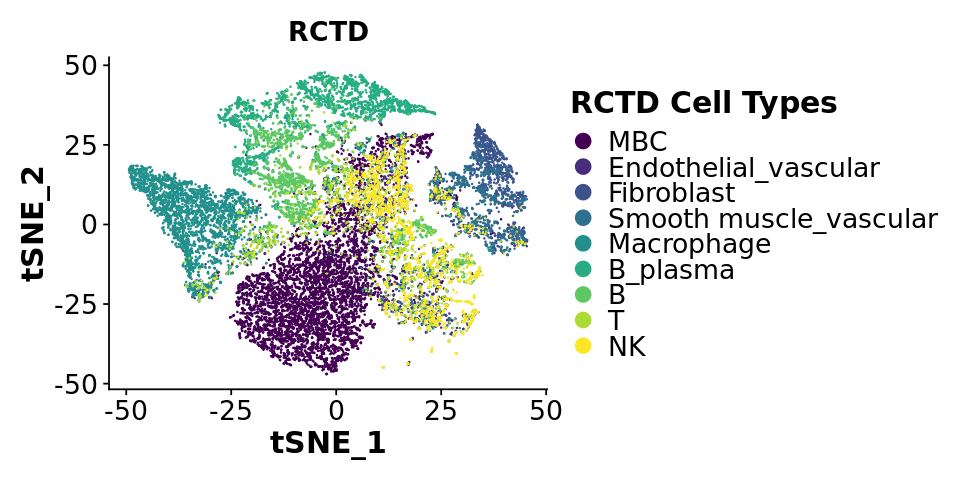

In [37]:
legend_title = "RCTD Cell Types"
options(repr.plot.width = 8, repr.plot.height = 4)
TSNEPlot(so, label.size = 18, group.by="RCTD") +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

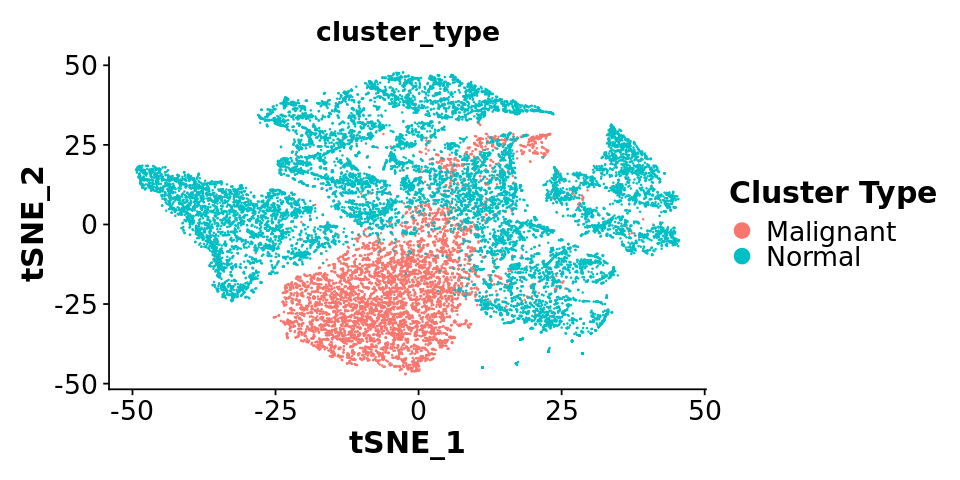

In [38]:
legend_title = "Cluster Type"
options(repr.plot.width = 8, repr.plot.height =4)
TSNEPlot(so, label.size = 18, group.by="cluster_type") +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

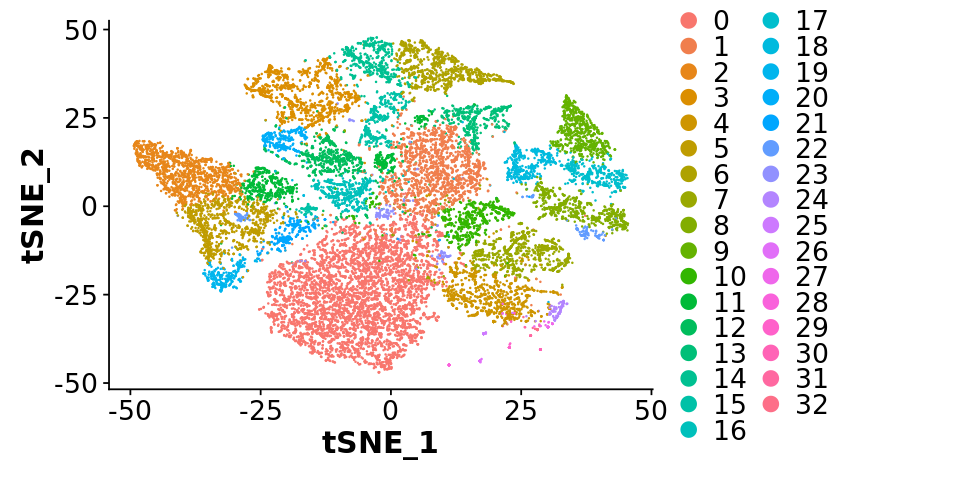

In [39]:
legend_title = "Seurat Clusters"
options(repr.plot.width = 8, repr.plot.height =4)
TSNEPlot(so, label.size = 18) +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

In [40]:
# Spatial plots

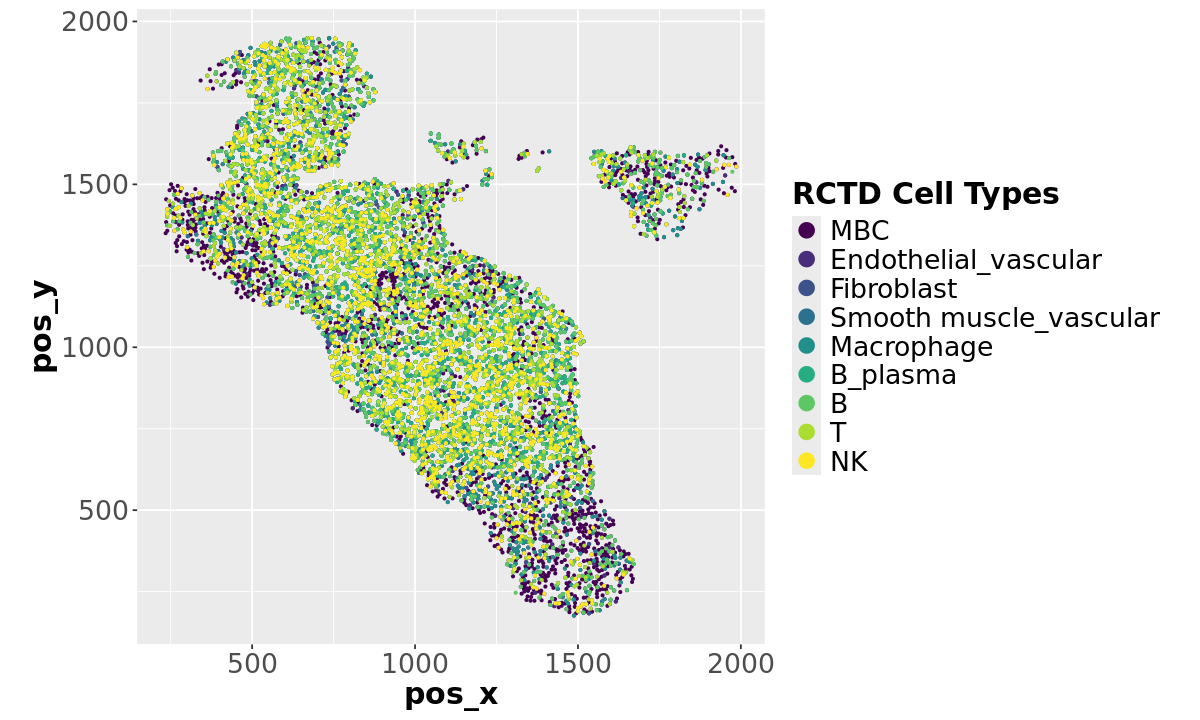

In [41]:
legend_title = "RCTD Cell Types"
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(md,aes(x=pos_x,y=pos_y,col=(RCTD)))+geom_point(size=0.5, position="jitter")+coord_fixed() +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

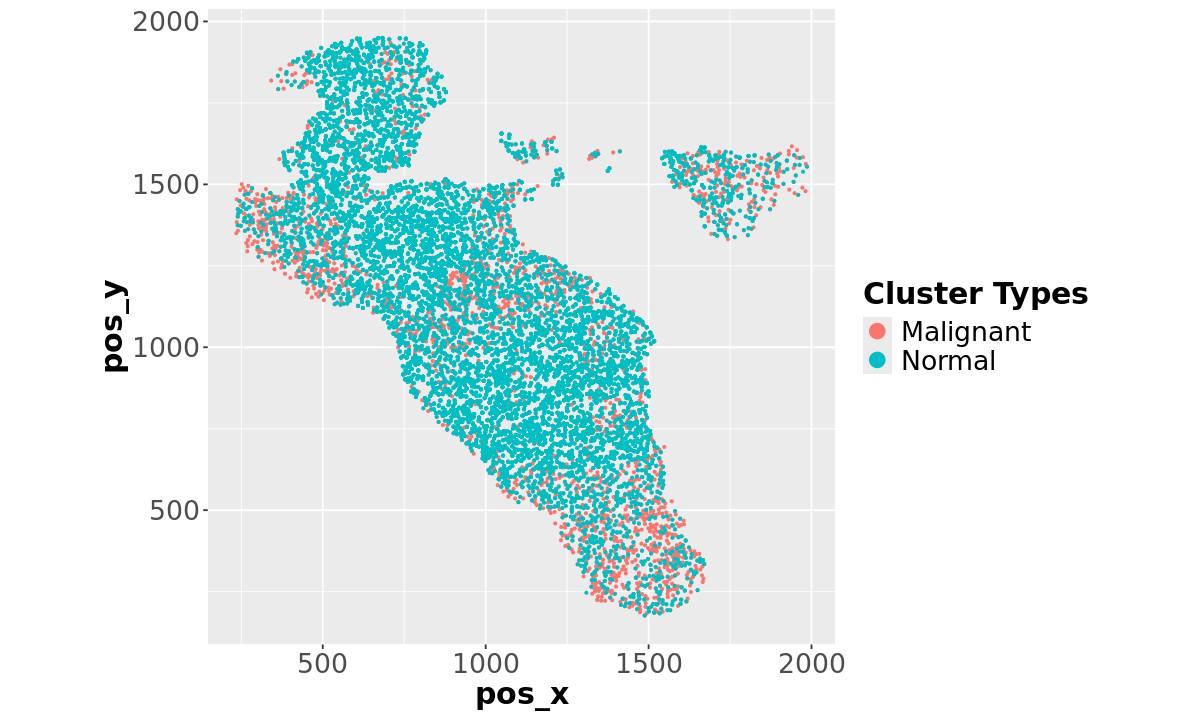

In [42]:
legend_title = "Cluster Types"
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(md,aes(x=pos_x,y=pos_y,col=(cluster_type)))+geom_point(size=0.5, position="jitter")+coord_fixed() +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

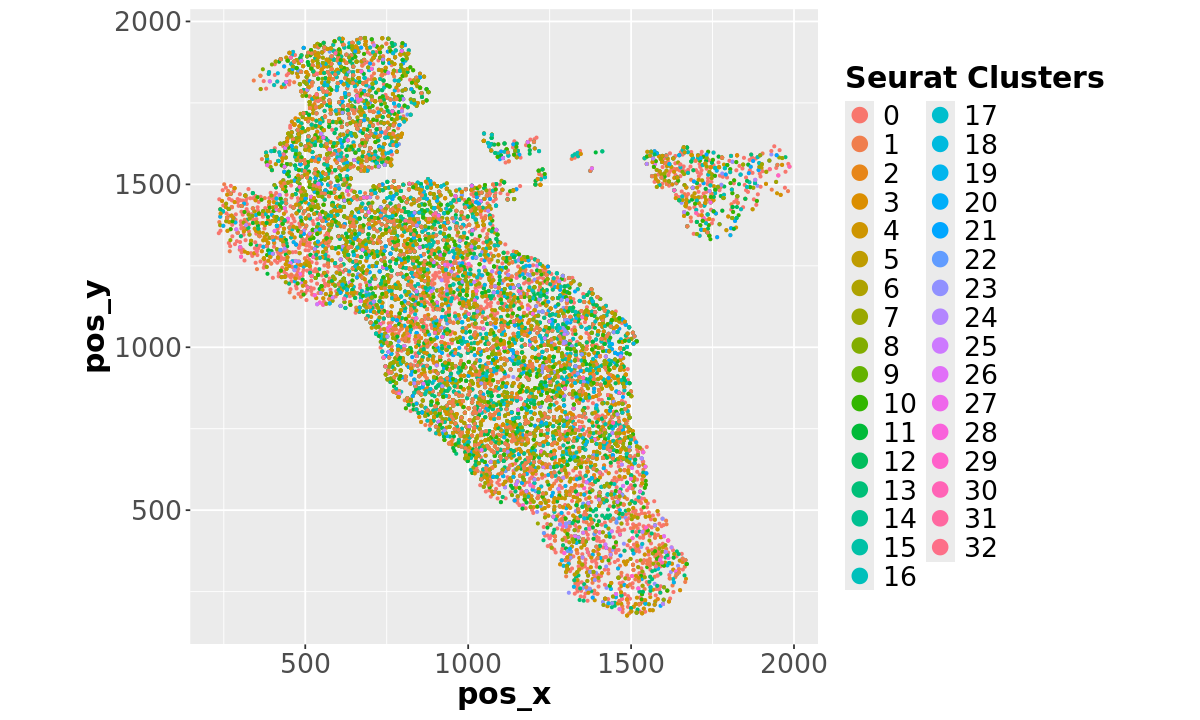

In [43]:
legend_title = "Seurat Clusters"
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(md,aes(x=pos_x,y=pos_y,col=as.factor(seurat_clusters)))+geom_point(size=0.5)+coord_fixed() +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

#### RCTD cell type markers

In [44]:
so=SetIdent(so,value = so@meta.data$RCTD)
markers_RCTD=FindAllMarkers(so)

Calculating cluster MBC

For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session

Calculating cluster Endothelial_vascular

Calculating cluster Fibroblast

Calculating cluster Smooth muscle_vascular

Calculating cluster Macrophage

Calculating cluster B_plasma

Calculating cluster B

Calculating cluster T

Calculating cluster NK



In [45]:
markers_RCTD=as.data.table(markers_RCTD)

In [46]:
markers_RCTD[order(avg_log2FC,decreasing=TRUE),.SD[1:5,],by="cluster"]

cluster,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,gene
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Fibroblast,0.000000e+00,5.564347,0.218,0.003,0.000000e+00,TIMP3
Fibroblast,0.000000e+00,5.449722,0.219,0.005,0.000000e+00,MMP11
Fibroblast,0.000000e+00,4.847660,0.139,0.002,0.000000e+00,POSTN
Fibroblast,0.000000e+00,4.753326,0.127,0.001,0.000000e+00,COL6A3
Fibroblast,0.000000e+00,4.627581,0.305,0.011,0.000000e+00,COL1A1
Macrophage,0.000000e+00,5.435069,0.309,0.003,0.000000e+00,APOC1
Macrophage,0.000000e+00,5.421146,0.416,0.028,0.000000e+00,APOE
Macrophage,0.000000e+00,5.302584,0.278,0.008,0.000000e+00,SPP1
Macrophage,0.000000e+00,4.437856,0.201,0.003,0.000000e+00,GPNMB


In [47]:
# Get gene ontology terms associated with each cluster

In [48]:
en_RCTD=markers_RCTD[order(avg_log2FC,decreasing=TRUE),run_enrichr(gene,50),by="cluster"]

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.


In [49]:
en_RCTD[GO_Biological_Process_2018.Adjusted.P.value<0.05][order(GO_Biological_Process_2018.Adjusted.P.value),.SD[1:2],by="cluster"]

cluster,GO_Biological_Process_2018.Term,GO_Biological_Process_2018.Overlap,GO_Biological_Process_2018.P.value,GO_Biological_Process_2018.Adjusted.P.value,GO_Biological_Process_2018.Old.P.value,GO_Biological_Process_2018.Old.Adjusted.P.value,GO_Biological_Process_2018.Odds.Ratio,GO_Biological_Process_2018.Combined.Score,GO_Biological_Process_2018.Genes
<fct>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
T,SRP-dependent cotranslational protein targeting to membrane (GO:0006614),24/89,1.348740e-44,7.741769e-42,0,0,282.39053,28525.5591,RPL5;RPL30;RPL31;RPLP1;RPS5;RPLP0;RPS6;RPL35A;RPL8;RPS4X;RPS14;RPS16;RPS19;RPS29;RPS3;RPL35;RPLP2;RPL13;RPL27;RPL37;RPL18;RPS21;RPS13;RPS23
T,cotranslational protein targeting to membrane (GO:0006613),24/93,4.532919e-44,1.300948e-41,0,0,265.96656,26544.0947,RPL5;RPL30;RPL31;RPLP1;RPS5;RPLP0;RPS6;RPL35A;RPL8;RPS4X;RPS14;RPS16;RPS19;RPS29;RPS3;RPL35;RPLP2;RPL13;RPL27;RPL37;RPL18;RPS21;RPS13;RPS23
Endothelial_vascular,SRP-dependent cotranslational protein targeting to membrane (GO:0006614),21/89,1.958261e-37,1.210205e-34,0,0,211.72515,17895.7703,RPL30;RPL32;RPL31;RPL34;RPL23;RPLP0;RPS4X;RPS14;RPS3;RPLP2;RPL35;RPL13;RPL38;RPL27;RPS20;RPL37;RPL18;UBA52;RPS21;RPL19;RPS23
Endothelial_vascular,cotranslational protein targeting to membrane (GO:0006613),21/93,5.527225e-37,1.707913e-34,0,0,199.92241,16690.7152,RPL30;RPL32;RPL31;RPL34;RPL23;RPLP0;RPS4X;RPS14;RPS3;RPLP2;RPL35;RPL13;RPL38;RPL27;RPS20;RPL37;RPL18;UBA52;RPS21;RPL19;RPS23
Smooth muscle_vascular,SRP-dependent cotranslational protein targeting to membrane (GO:0006614),18/89,1.206434e-30,6.985252e-28,0,0,157.49208,10849.6109,RPL5;RPL30;RPL32;RPL23;RPS6;RPS19;RPL27A;RPLP2;RPL13;RPL27;RPS20;RPL37;RPL18;UBA52;RPS21;RPS13;RPL19;RPS23
Smooth muscle_vascular,cotranslational protein targeting to membrane (GO:0006613),18/93,2.880638e-30,8.339446e-28,0,0,149.06250,10139.1628,RPL5;RPL30;RPL32;RPL23;RPS6;RPS19;RPL27A;RPLP2;RPL13;RPL27;RPS20;RPL37;RPL18;UBA52;RPS21;RPS13;RPL19;RPS23
B_plasma,SRP-dependent cotranslational protein targeting to membrane (GO:0006614),17/89,1.818590e-28,6.965201e-26,0,0,142.22475,9084.5092,RPL31;RPL34;RPS5;RPS4X;RPS14;RPS16;RPS19;RPS29;RPL35;RPLP2;RPL13;RPL27;RPS20;RPL15;RPS11;RPL18;UBA52
B_plasma,cotranslational protein targeting to membrane (GO:0006613),17/93,4.113027e-28,7.876446e-26,0,0,134.71212,8494.7070,RPL31;RPL34;RPS5;RPS4X;RPS14;RPS16;RPS19;RPS29;RPL35;RPLP2;RPL13;RPL27;RPS20;RPL15;RPS11;RPL18;UBA52
Fibroblast,SRP-dependent cotranslational protein targeting to membrane (GO:0006614),12/89,2.950616e-18,1.619685e-15,0,0,81.50239,3289.8047,RPS4X;RPL5;RPS16;RPL32;RPL34;RPL23;RPL13;RPS11;RPS21;RPS13;RPS24;RPL19


In [50]:
save(markers_RCTD, file=glue("{samp_dir}/markers_RCTD.Robj"))

#### Seurat cluster markers

In [51]:
so=SetIdent(so,value = so@meta.data$seurat_clusters)
markers=FindAllMarkers(so)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20

Calculating cluster 21

Calculating cluster 22

Calculating cluster 23

Calculating cluster 24

Calculating cluster 25

Calculating cluster 26

Calculating cluster 27

Calculating cluster 28

Calculating cluster 29

Calculating cluster 30

Calculating cluster 31

Calculating cluster 32



In [52]:
markers=as.data.table(markers)

In [53]:
markers[avg_log2FC>0&p_val_adj<0.05][order(avg_log2FC,decreasing=TRUE),.SD[1:4,],by="cluster"]

cluster,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,gene
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
23,2.529883e-254,5.5553638,0.481,0.027,3.592433e-250,HBB
23,2.654369e-76,5.2018513,0.284,0.031,3.769205e-72,MED13L
23,6.904959e-21,0.9090027,0.920,0.766,9.805042e-17,MALAT1
23,NA,NA,NA,NA,NA,NA
22,7.186690e-213,4.5059096,0.522,0.043,1.020510e-208,FN1
22,NA,NA,NA,NA,NA,NA
22,NA,NA,NA,NA,NA,NA
22,NA,NA,NA,NA,NA,NA
9,0.000000e+00,4.3609387,0.348,0.009,0.000000e+00,MMP11


In [54]:
save(markers, file="path/to/results/markers.Robj")

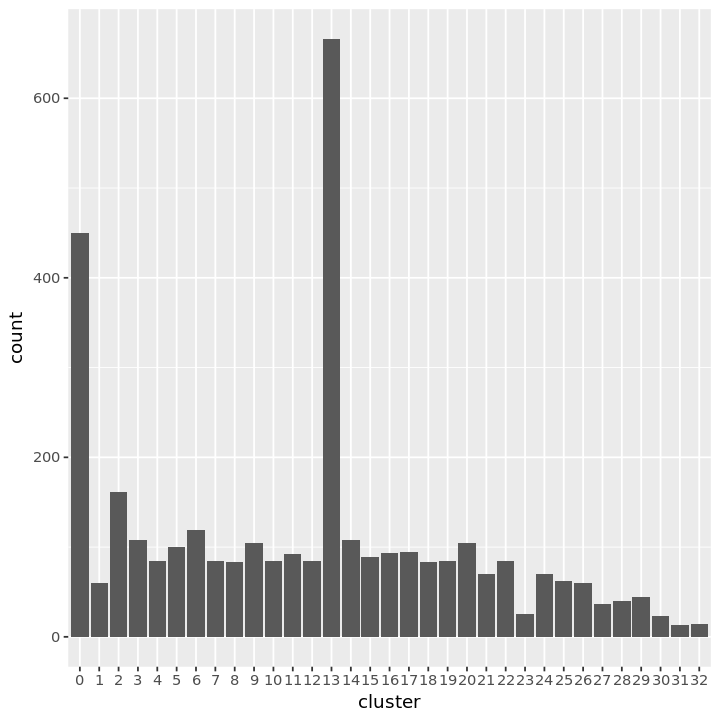

In [55]:
# Number of genes in each cluster
options(repr.plot.width = 6, repr.plot.height = 6)
ggplot(data=markers, aes(x=cluster)) +
  geom_bar(stat="count")

In [56]:
# Get gene ontology terms associated with each cluster

In [57]:
en=markers[avg_log2FC>0&p_val_adj<0.05][order(avg_log2FC,decreasing=TRUE),run_enrichr(gene,100),by="cluster"]

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  

In [58]:
en[GO_Biological_Process_2018.Adjusted.P.value<0.05][order(GO_Biological_Process_2018.Adjusted.P.value),.SD[1:2],by="cluster"]

cluster,GO_Biological_Process_2018.Term,GO_Biological_Process_2018.Overlap,GO_Biological_Process_2018.P.value,GO_Biological_Process_2018.Adjusted.P.value,GO_Biological_Process_2018.Old.P.value,GO_Biological_Process_2018.Old.Adjusted.P.value,GO_Biological_Process_2018.Odds.Ratio,GO_Biological_Process_2018.Combined.Score,GO_Biological_Process_2018.Genes
<fct>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
4,SRP-dependent cotranslational protein targeting to membrane (GO:0006614),15/89,4.343941e-28,1.516035e-25,0,0,252.04814,15879.9405,RPL5;RPL30;RPL31;RPS8;RPL34;RPS6;RPS4X;RPS14;RPS19;RPL27A;RPL13;RPL27;RPL37;RPL18;RPS13
4,cotranslational protein targeting to membrane (GO:0006613),15/93,8.865193e-28,1.546976e-25,0,0,239.07452,14892.0116,RPL5;RPL30;RPL31;RPS8;RPL34;RPS6;RPS4X;RPS14;RPS19;RPL27A;RPL13;RPL27;RPL37;RPL18;RPS13
6,"complement activation, classical pathway (GO:0006958)",13/123,4.445563e-24,5.676507e-22,0,0,260.89293,14028.2482,IGHM;IGLV3-1;IGHG3;IGLL5;IGHG4;IGHG1;IGHG2;IGKC;IGLV3-21;IGLC3;IGHD;IGLC2;IGHA1
6,humoral immune response mediated by circulating immunoglobulin (GO:0002455),13/125,5.538055e-24,5.676507e-22,0,0,256.20833,13720.0584,IGHM;IGLV3-1;IGHG3;IGLL5;IGHG4;IGHG1;IGHG2;IGKC;IGLV3-21;IGLC3;IGHD;IGLC2;IGHA1
14,regulation of B cell activation (GO:0050864),9/95,8.301994e-21,1.164317e-19,0,0,2082.97674,96312.2439,IGHG3;IGHM;IGLL5;IGHG4;IGHG1;IGHG2;IGKC;IGLC3;IGLC2
14,plasma membrane invagination (GO:0099024),9/103,1.772672e-20,1.164317e-19,0,0,1904.93617,86634.9999,IGHG3;IGHM;IGLL5;IGHG4;IGHG1;IGHG2;IGKC;IGLC3;IGLC2
2,neutrophil degranulation (GO:0043312),27/479,1.782585e-21,1.089751e-18,0,0,16.36389,781.8049,CSTB;CD63;GRN;ASAH1;CTSZ;ITGB2;CTSS;LGALS3;GM2A;FTH1;PSAP;TIMP2;CTSH;CD59;CD14;CTSC;CTSB;FCER1G;ANXA2;CYBA;LYZ;RHOA;VAMP8;TYROBP;NPC2;CD68;FTL
2,neutrophil activation involved in immune response (GO:0002283),27/483,2.214212e-21,1.089751e-18,0,0,16.21701,771.2712,CSTB;CD63;GRN;ASAH1;CTSZ;ITGB2;CTSS;LGALS3;GM2A;FTH1;PSAP;TIMP2;CTSH;CD59;CD14;CTSC;CTSB;FCER1G;ANXA2;CYBA;LYZ;RHOA;VAMP8;TYROBP;NPC2;CD68;FTL
7,SRP-dependent cotranslational protein targeting to membrane (GO:0006614),11/89,5.221016e-20,7.909429e-18,0,0,187.05641,8305.1194,RPS4X;RPL5;RPS14;RPL31;RPS8;RPS29;RPL34;RPL27A;RPL11;RPL18;RPS24


In [59]:
markers[avg_log2FC>0&p_val_adj<0.05][order(avg_log2FC,decreasing=TRUE),.SD[cluster==7]]

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1.187930e-42,1.2941830,0.592,0.548,1.686861e-38,7,B2M
7.445941e-08,1.2453961,0.070,0.142,1.057324e-03,7,RPL5
9.699900e-07,0.9469236,0.084,0.154,1.377386e-02,7,RPL18
3.288402e-11,0.8237101,0.067,0.158,4.669530e-07,7,RPL27A
3.770368e-13,0.7466184,0.038,0.121,5.353922e-09,7,SNRPD2
3.117038e-10,0.7249054,0.056,0.135,4.426195e-06,7,HNRNPA2B1
3.812481e-10,0.6739468,0.077,0.167,5.413723e-06,7,RPS4X
1.608595e-09,0.6696693,0.036,0.101,2.284206e-05,7,RPL34
3.018321e-14,0.5632181,0.039,0.129,4.286015e-10,7,RPS12


Warning message:
"The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
i Please use the `layer` argument instead."


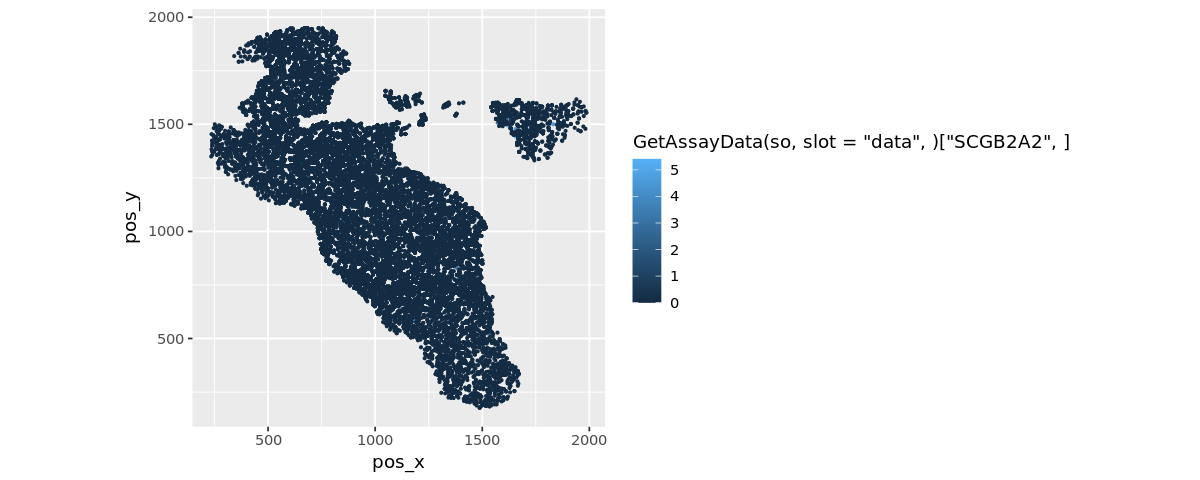

In [60]:
options(repr.plot.width = 10, repr.plot.height =4)
ggplot(md,aes(x=pos_x,y=pos_y,col=GetAssayData(so, slot = "data",)["SCGB2A2",]))+geom_point(size=0.5)+coord_fixed()

#### Run SlideCNA

In [7]:
library(SlideCNA)


Attaching package: 'SlideCNA'


The following object is masked _by_ '.GlobalEnv':

    run_enrichr


The following object is masked from 'package:Seurat':

    SpatialPlot


The following object is masked from 'package:base':

    mode




In [19]:
load(file="path/to/data/gene_pos.Robj")
load(file="path/to/results/so.Robj")
load(file="path/to/results/md.Robj")

In [11]:
summary(so)

Length  Class   Mode 
     1 Seurat     S4 

In [12]:
head(md)

orig.ident,nCount_RNA,nFeature_RNA,percent.mito,RNA_snn_res.0.8,seurat_clusters,bc,pos_x,pos_y,replicate,RCTD,orig_bc,cluster_type
<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<fct>,<ord>,<chr>,<chr>
SeuratProject,274,261,0,2,2,TCATATACTGTTGT-1-1,573.4835,1325.0195,1,B,TCATATACTGTTGT-1,Normal
SeuratProject,85,85,0,2,2,TACTTTCAGGACTG-1-1,553.3513,1388.4575,1,B,TACTTTCAGGACTG-1,Normal
SeuratProject,260,247,0,2,2,AACCCAAGTTAGGG-1-1,857.6451,1081.8535,1,B,AACCCAAGTTAGGG-1,Normal
SeuratProject,247,233,0,2,2,ACTCAGGCCTCCAC-1-1,898.0179,1044.6019,1,B,ACTCAGGCCTCCAC-1,Normal
SeuratProject,214,192,0,2,2,TTCGCTCCACACTT-1-1,1220.1276,701.8704,1,B,TTCGCTCCACACTT-1,Normal
SeuratProject,171,163,0,2,2,TATGCGGTCGACAA-1-1,694.5063,1551.9726,1,B,TATGCGGTCGACAA-1,Normal


In [20]:
OUTPUT_DIRECTORY <- "path/to/results/SlideCNA"
plotDir <- "path/to/results/SlideCNA/plots"
dir.create(OUTPUT_DIRECTORY)
dir.create(plotDir)

Warning message in dir.create(OUTPUT_DIRECTORY):
"'/ahg/regevdata/users/dzhang/projects/HTAPP_MBC/src/slide_CNV_official/SlideCNA_Analysis/results/HTAPP-895-SMP-7359/slide-seq/bead_split/SlideCNA' already exists"
Warning message in dir.create(plotDir):
"'/ahg/regevdata/users/dzhang/projects/HTAPP_MBC/src/slide_CNV_official/SlideCNA_Analysis/results/HTAPP-895-SMP-7359/slide-seq/bead_split/SlideCNA/plots' already exists"


In [ ]:
run_slide_cna(so, 
              md, 
              gene_pos,
              plotDir,
              OUTPUT_DIRECTORY,
              spatial=TRUE)

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.5 GiB"
Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.5 GiB"
